## Bag of Words & TF-IDF

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize

In [ ]:
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "I love natural language processing and deep learning",
    "Word embeddings capture semantic relationships between words",
    "The fox is quick and the dog is lazy",
    "Deep learning models learn representations automatically",
    "I love to learn about NLP and machine learning",
    "The king and the queen shared their kingdom fairly",
    "A man and a woman walked into the room",
    "The queen loves her people and the king protects them",
    "Natural language tasks include translation and summarization"
       ]

#### BOW Step by step implementation

In [ ]:
vocab_list = []
for sentence in corpus:
    for word in sentence.lower().split():
        if word not in vocab_list:
            vocab_list.append(word)

In [12]:
vocabulary = set(vocab_list)

In [13]:
vocabulary

{'a',
 'about',
 'and',
 'automatically',
 'between',
 'brown',
 'capture',
 'deep',
 'dog',
 'embeddings',
 'fairly',
 'fox',
 'her',
 'i',
 'include',
 'into',
 'is',
 'jumps',
 'king',
 'kingdom',
 'language',
 'lazy',
 'learn',
 'learning',
 'love',
 'loves',
 'machine',
 'man',
 'models',
 'natural',
 'nlp',
 'over',
 'people',
 'processing',
 'protects',
 'queen',
 'quick',
 'relationships',
 'representations',
 'room',
 'semantic',
 'shared',
 'summarization',
 'tasks',
 'the',
 'their',
 'them',
 'to',
 'translation',
 'walked',
 'woman',
 'word',
 'words'}

In [14]:
word_index = {}
for idx, word in enumerate(sorted(vocabulary)):
    word_index[word] = idx

In [15]:
word_index

{'a': 0,
 'about': 1,
 'and': 2,
 'automatically': 3,
 'between': 4,
 'brown': 5,
 'capture': 6,
 'deep': 7,
 'dog': 8,
 'embeddings': 9,
 'fairly': 10,
 'fox': 11,
 'her': 12,
 'i': 13,
 'include': 14,
 'into': 15,
 'is': 16,
 'jumps': 17,
 'king': 18,
 'kingdom': 19,
 'language': 20,
 'lazy': 21,
 'learn': 22,
 'learning': 23,
 'love': 24,
 'loves': 25,
 'machine': 26,
 'man': 27,
 'models': 28,
 'natural': 29,
 'nlp': 30,
 'over': 31,
 'people': 32,
 'processing': 33,
 'protects': 34,
 'queen': 35,
 'quick': 36,
 'relationships': 37,
 'representations': 38,
 'room': 39,
 'semantic': 40,
 'shared': 41,
 'summarization': 42,
 'tasks': 43,
 'the': 44,
 'their': 45,
 'them': 46,
 'to': 47,
 'translation': 48,
 'walked': 49,
 'woman': 50,
 'word': 51,
 'words': 52}

In [16]:
bow_matrix = np.zeros((len(corpus), len(vocabulary)), dtype=int)

In [17]:
# Fill the matrix
for i, sentence in enumerate(corpus):
    words = sentence.lower().split()
    for word in words:
        if word in word_index:  # safety check
            bow_matrix[i, word_index[word]] += 1

In [19]:
bow_df = pd.DataFrame(bow_matrix, columns=sorted(vocabulary))
bow_df

,a,about,and,automatically,between,brown,capture,deep,dog,embeddings,...,tasks,the,their,them,to,translation,walked,woman,word,words
0,0,0,0,0,0,1,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,0,0,1,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
7,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


#### Count BoW Implementation

In [23]:
def get_bow_representation(corpus, frequency = True):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])

    bow_rep = []
    for sentence in corpus:
        sentence_rep = dict([(v,0) for v in vocabulary])
        for word in word_tokenize(sentence.lower()):
            if frequency:
                sentence_rep[word] += 1
            else:
                sentence_rep[word] = 1
        bow_rep.append(sentence_rep)
    return bow_rep

In [25]:
bow_representation = get_bow_representation(corpus, True)
df = pd.DataFrame(bow_representation)
df.index = corpus
display(df.head())

,them,protects,fairly,embeddings,shared,is,love,relationships,semantic,quick,...,into,fox,translation,language,to,people,woman,kingdom,dog,room
The quick brown fox jumps over the lazy dog,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
I love natural language processing and deep learning,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Word embeddings capture semantic relationships between words,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
The fox is quick and the dog is lazy,0,0,0,0,0,2,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
Deep learning models learn representations automatically,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Term Frequency - Inverse Documnet Frequency (TF-IDF)

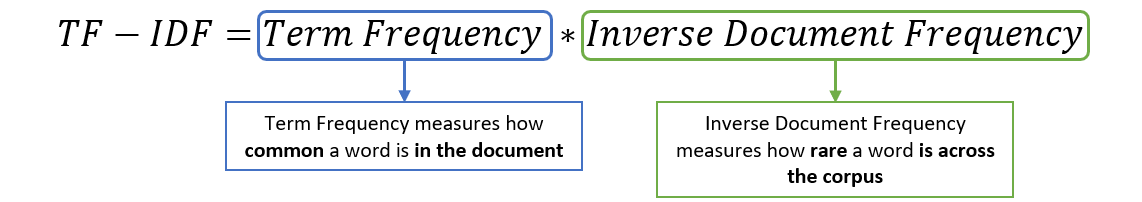

In [28]:
def get_term_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])

    term_freq = []
    for sentence in corpus:
        sentence_tf = dict([(v,0) for v in vocabulary])
        for word in word_tokenize(sentence.lower()):
            sentence_tf[word] += 1
        for v in vocabulary:
            sentence_tf[v] /= len(word_tokenize(sentence))
        term_freq.append(sentence_tf)
    return term_freq

#### What is Term Frequency (TF) in TF-IDF?

- Term Frequency is the measure of how common a word (or token) is in the document.
- More `common words` (or tokens) `of a document` would have a `higher term frequency`.This is calculated for every word in a document.

- There are various ways to determine the term frequency. One of the most common formulation of TF is -
$$TF(t,d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}} $$

Here,
* $TF(t,d)$ is the term Frequency of term $t$ in document $d$
* $f_{t,d}$ is the frequency of term $t$ in document $d$

The above formulation is simply the ratio of the frequency of a term in the document to the total number of terms in the document. TF of the term increases as the frequency of the term increases.

In [32]:
get_term_frequency(corpus)

[{'them': 0.0,
  'protects': 0.0,
  'fairly': 0.0,
  'embeddings': 0.0,
  'shared': 0.0,
  'is': 0.0,
  'love': 0.0,
  'relationships': 0.0,
  'semantic': 0.0,
  'quick': 0.1111111111111111,
  'and': 0.0,
  'models': 0.0,
  'man': 0.0,
  'brown': 0.1111111111111111,
  'lazy': 0.1111111111111111,
  'i': 0.0,
  'processing': 0.0,
  'king': 0.0,
  'walked': 0.0,
  'learning': 0.0,
  'deep': 0.0,
  'capture': 0.0,
  'jumps': 0.1111111111111111,
  'summarization': 0.0,
  'natural': 0.0,
  'automatically': 0.0,
  'a': 0.0,
  'nlp': 0.0,
  'about': 0.0,
  'learn': 0.0,
  'tasks': 0.0,
  'between': 0.0,
  'her': 0.0,
  'queen': 0.0,
  'loves': 0.0,
  'representations': 0.0,
  'over': 0.1111111111111111,
  'their': 0.0,
  'words': 0.0,
  'word': 0.0,
  'include': 0.0,
  'the': 0.2222222222222222,
  'machine': 0.0,
  'into': 0.0,
  'fox': 0.1111111111111111,
  'translation': 0.0,
  'language': 0.0,
  'to': 0.0,
  'people': 0.0,
  'woman': 0.0,
  'kingdom': 0.0,
  'dog': 0.1111111111111111,
  'ro

In [29]:
def get_inverse_document_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
    n = len(corpus)

    inverse_document_frequency = {}
    for v in vocabulary:
        num_docs = 0
        for sentence in corpus:
            if v in word_tokenize(sentence.lower()):
                num_docs += 1
        inverse_document_frequency[v] = np.log(n/num_docs)
    return inverse_document_frequency

#### Inverse Document Frequency (IDF)

- Inverse Document Frequency measures `how rare a word (or token) is across corpus`.
- A `rarer word` (or token) would have a `larger IDF`. There are multiple ways to determine IDF as well.

- One of the most common formulation is -
$$IDF(t,C) = log(\frac{|d|}{|{d \in C : t \in d}|})$$

Here,
* $IDF(t,d,C)$ is the Inverse Document Frequency of term $t$ in corpus $C$. As we can see from the formulation, IDF is calculated for each word at corpus level and not for individual documents.
* $|d|$ is the absolute number of documents in the corpus.
* $|{d \in C : t \in d}|$ is the number of documents in corpus $C$ which contains the term $t$

In [33]:
get_inverse_document_frequency(corpus)

{'them': np.float64(2.302585092994046),
 'protects': np.float64(2.302585092994046),
 'fairly': np.float64(2.302585092994046),
 'embeddings': np.float64(2.302585092994046),
 'shared': np.float64(2.302585092994046),
 'is': np.float64(2.302585092994046),
 'love': np.float64(1.6094379124341003),
 'relationships': np.float64(2.302585092994046),
 'semantic': np.float64(2.302585092994046),
 'quick': np.float64(1.6094379124341003),
 'and': np.float64(0.3566749439387324),
 'models': np.float64(2.302585092994046),
 'man': np.float64(2.302585092994046),
 'brown': np.float64(2.302585092994046),
 'lazy': np.float64(1.6094379124341003),
 'i': np.float64(1.6094379124341003),
 'processing': np.float64(2.302585092994046),
 'king': np.float64(1.6094379124341003),
 'walked': np.float64(2.302585092994046),
 'learning': np.float64(1.2039728043259361),
 'deep': np.float64(1.6094379124341003),
 'capture': np.float64(2.302585092994046),
 'jumps': np.float64(2.302585092994046),
 'summarization': np.float64(2.3

In [30]:
def get_tf_idf(corpus):
    tf = get_term_frequency(corpus)
    idf = get_inverse_document_frequency(corpus)

    tf_idf = []
    for tf_dict in tf:
        tf_idf_sentence = {}
        for t, term_freq in tf_dict.items():
            tf_idf_sentence[t] = term_freq * idf[t]
        tf_idf.append(tf_idf_sentence)

    return tf_idf

In [31]:
tf_idf = get_tf_idf(corpus)
df = pd.DataFrame(tf_idf)
df.index = corpus
display(df.head())

,them,protects,fairly,embeddings,shared,is,love,relationships,semantic,quick,...,into,fox,translation,language,to,people,woman,kingdom,dog,room
The quick brown fox jumps over the lazy dog,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.178826,...,0.0,0.178826,0.0,0.00000,0.0,0.0,0.0,0.0,0.178826,0.0
I love natural language processing and deep learning,0.0,0.0,0.0,0.000000,0.0,0.000000,0.20118,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.20118,0.0,0.0,0.0,0.0,0.000000,0.0
Word embeddings capture semantic relationships between words,0.0,0.0,0.0,0.328941,0.0,0.000000,0.00000,0.328941,0.328941,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
The fox is quick and the dog is lazy,0.0,0.0,0.0,0.000000,0.0,0.511686,0.00000,0.000000,0.000000,0.178826,...,0.0,0.178826,0.0,0.00000,0.0,0.0,0.0,0.0,0.178826,0.0
Deep learning models learn representations automatically,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
